<a href="https://colab.research.google.com/github/lynnkuan/python/blob/main/ti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import datetime as dt
import gc

In [73]:
file = 'FullQuote_2025-01-05_1658_WarrantTradev1.txt'
df = pd.read_csv(file,sep='\t',encoding='utf-8')
df = df.sort_values(by='QuoteTime', ascending=True)
print(df)

       index  Symbol ProductType            QuoteTime  MSec     SeqNo  \
0        180    2330           S  2025-01-02 09:00:02   430     83640   
1    1344150    2330           S  2025-01-02 13:30:00     0   9606906   
2    1345878    2330           S  2025-01-03 09:00:02   564     90449   
3    2939314    2330           S  2025-01-03 13:30:00     0   8935258   
4    2941108    2330           S  2025-01-06 09:00:03   283     89689   
5    4681069    2330           S  2025-01-06 11:10:17   424   5546888   
6    4681080   52094          WC  2025-01-06 11:10:17   506  25894999   
7    4683401    2330           S  2025-01-06 11:10:24   799   5550379   
8    4683495   52094          WC  2025-01-06 11:10:24   930  25908304   
9    4828329    2330           S  2025-01-06 11:23:12   978   5924914   
10   4828341   46775          WC  2025-01-06 11:23:13   157  27331108   
11   5153822    2330           S  2025-01-06 11:46:39   859   6592541   
12   5153859   52094          WC  2025-01-06 11:46:

In [74]:
df = df.drop(columns=['index','SorB','MSec', 'SeqNo','Bid2', 'BidSize2', 'Bid3', 'BidSize3', 'Bid4', 'BidSize4', 'Bid5', 'BidSize5',
                 'Ask2', 'AskSize2', 'Ask3', 'AskSize3', 'Ask4', 'AskSize4', 'Ask5', 'AskSize5',
                 'UnderlyingTradeTimeMSec','Moneyness','UlLocalMilliseconds','DurationMSecs','FullQuoteKey','UnderlyingSeqNo', 'QuoteUpdateType', 'Microseconds','QuoteDate','ActionsString','date'],axis=1)
df

,Symbol,ProductType,QuoteTime,Price,Volume,Bid1,BidSize1,Ask1,AskSize1,UnderlyingTradeTime,...,JsonNote,LocalMicroseconds,Issuer,TradedVol,SoleBuyer,SoleSeller,PrevAsk,PrevAskSize,PrevBid,PrevBidSize
0,2330,S,2025-01-02 09:00:02,1070.00,1707,1070.00,308,1075.00,2889,2025-01-02 09:00:02,...,NaN,32402424119,NaN,0.000000,NaN,NaN,0.00,0,0.00,0
1,2330,S,2025-01-02 13:30:00,1065.00,3982,1065.00,395,1070.00,1638,2025-01-02 13:30:00,...,NaN,48603375385,NaN,0.000000,NaN,NaN,1065.00,962,1060.00,799
2,2330,S,2025-01-03 09:00:02,1080.00,2681,1075.00,3226,1080.00,685,2025-01-03 09:00:02,...,NaN,32402553514,NaN,0.000000,NaN,NaN,0.00,0,0.00,0
3,2330,S,2025-01-03 13:30:00,1075.00,2164,1075.00,2868,1080.00,327,2025-01-03 13:30:00,...,NaN,48603527014,NaN,0.000000,NaN,NaN,1080.00,109,1075.00,2019
4,2330,S,2025-01-06 09:00:03,1100.00,3717,1095.00,5280,1100.00,4257,2025-01-06 09:00:03,...,NaN,32403273706,NaN,0.000000,NaN,NaN,0.00,0,0.00,0
5,2330,S,2025-01-06 11:10:17,1115.00,0,1110.00,4200,1115.00,1808,2025-01-06 11:10:17,...,NaN,40217384479,NaN,0.000000,NaN,NaN,1115.00,1808,1110.00,4200
6,52094,WC,2025-01-06 11:10:17,1.01,200,1.00,499,1.01,299,2025-01-06 11:10:17,...,NaN,40217471544,9100.0,0.430622,9868,9100.0,1.01,499,1.00,499
7,2330,S,2025-01-06 11:10:24,1115.00,0,1110.00,4194,1115.00,1804,2025-01-06 11:10:24,...,NaN,40224761668,NaN,0.000000,NaN,NaN,1115.00,1804,1110.00,4194
8,52094,WC,2025-01-06 11:10:24,1.01,299,1.00,499,1.01,200,2025-01-06 11:10:24,...,NaN,40224904624,9100.0,0.430622,981i,9100.0,1.05,499,1.01,299
9,2330,S,2025-01-06 11:23:12,1120.00,0,1115.00,4066,1120.00,5947,2025-01-06 11:23:12,...,NaN,40992961015,NaN,0.000000,NaN,NaN,1120.00,5947,1115.00,4066


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Symbol               20 non-null     int64  
 1   ProductType          20 non-null     object 
 2   QuoteTime            20 non-null     object 
 3   Price                20 non-null     float64
 4   Volume               20 non-null     int64  
 5   Bid1                 20 non-null     float64
 6   BidSize1             20 non-null     int64  
 7   Ask1                 20 non-null     float64
 8   AskSize1             20 non-null     int64  
 9   UnderlyingTradeTime  20 non-null     object 
 10  UnderlyingPrice      20 non-null     int64  
 11  UnderlyingBid1       20 non-null     int64  
 12  UnderlyingBidSize1   20 non-null     int64  
 13  UnderlyingAsk1       20 non-null     int64  
 14  UnderlyingAskSize1   20 non-null     int64  
 15  MarketMakerBuySell   20 non-null     objec

In [104]:
column = df.iloc[:,0]
unique_column = np.unique(column)
unique_column

array([ 2330, 46775, 52094])

In [97]:
df1 = df.groupby(['ProductType']).count()
df1

,Symbol,QuoteTime,Price,Volume,Bid1,BidSize1,Ask1,AskSize1,UnderlyingTradeTime,UnderlyingPrice,...,JsonNote,LocalMicroseconds,Issuer,TradedVol,SoleBuyer,SoleSeller,PrevAsk,PrevAskSize,PrevBid,PrevBidSize
ProductType,,,,,,,,,,,,,,,,,,,,,
S,15,15,15,15,15,15,15,15,15,15,...,0,15,0,15,0,0,15,15,15,15
WC,5,5,5,5,5,5,5,5,5,5,...,0,5,5,5,5,5,5,5,5,5


In [76]:
df.describe()

,Symbol,Price,Volume,Bid1,BidSize1,Ask1,AskSize1,UnderlyingPrice,UnderlyingBid1,UnderlyingBidSize1,...,UnderlyingVolume,JsonNote,LocalMicroseconds,Issuer,TradedVol,SoleSeller,PrevAsk,PrevAskSize,PrevBid,PrevBidSize
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.00000,20.000000,20.000000,...,20.000000,0.0,2.000000e+01,5.0,20.000000,5.0,20.000000,20.000000,20.000000,20.000000
mean,14505.050000,830.755500,2227.650000,828.501000,2508.900000,832.25750,1525.200000,1110.00000,1106.500000,3435.800000,...,2149.550000,NaN,4.097713e+10,9100.0,0.120425,9100.0,556.456000,1195.300000,554.002000,1423.300000
std,21663.143523,491.352655,2475.339855,490.008668,1949.663396,492.21649,1716.729161,21.82466,21.157306,1615.195559,...,2541.397636,NaN,5.968031e+09,0.0,0.222180,0.0,570.185734,1696.057754,567.574492,1725.910838
min,2330.000000,1.010000,0.000000,1.000000,308.000000,1.01000,77.000000,1065.00000,1065.000000,308.000000,...,0.000000,NaN,3.240067e+10,9100.0,0.000000,9100.0,0.000000,0.000000,0.000000,0.000000
25%,2330.000000,800.250000,150.750000,800.237500,499.000000,804.00000,199.500000,1103.75000,1102.500000,2723.250000,...,0.000000,NaN,3.826386e+10,9100.0,0.000000,9100.0,0.000000,0.000000,0.750000,195.750000
50%,2330.000000,1102.500000,1103.000000,1100.000000,2578.500000,1105.00000,692.000000,1115.00000,1110.000000,3905.500000,...,855.000000,NaN,4.099305e+10,9100.0,0.000000,9100.0,535.500000,499.000000,532.975000,499.000000
75%,13441.250000,1120.000000,4082.250000,1115.000000,4098.000000,1120.00000,2078.250000,1121.25000,1116.250000,4200.000000,...,4082.250000,NaN,4.471779e+10,9100.0,0.101488,9100.0,1116.250000,1780.000000,1111.250000,2450.500000
max,52094.000000,1150.000000,7039.000000,1150.000000,6305.000000,1155.00000,5947.000000,1150.00000,1150.000000,6305.000000,...,7039.000000,NaN,4.860421e+10,9100.0,0.713831,9100.0,1140.000000,5947.000000,1135.000000,4793.000000


In [77]:
array = np.array(df)
array.shape

(20, 39)

In [123]:
dataframes = []
chunks = []
chunk_size = 10000
transactions = defaultdict(lambda: defaultdict(dict))
daily_prices = defaultdict(dict)

In [124]:
array[1,:]

array([2330, 'S', '2025-01-02 13:30:00', 1065.0, 3982, 1065.0, 395,
       1070.0, 1638, '2025-01-02 13:30:00', 1065, 1065, 395, 1070, 1638,
       '-', -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 48603375,
       3982, 'BrokerNotSet', 'BrokerNotSet', nan, 48603375385, nan, 0.0,
       nan, nan, 1065.0, 962, 1060.0, 799], dtype=object)

In [151]:
import numpy as np
from collections import defaultdict

transactions = defaultdict(lambda: defaultdict(dict))
daily_prices = defaultdict(lambda: {"OpenPrice": None, "ClosePrice": None})

for chunk in [array]:
    for i, row in enumerate(chunk):
        if (row[1] == 'WC') and (row[34] == 9100.0) and (np.isin(row[33], ['9824', '9868', '981i', '983i'])).all():
            quotetime = row[2]
            symbol = row[0]
            SoleBuyer_key = row[33]
            date_key = row[2]
            symbol_key = row[0]

            transaction_sprice = None
            for j in range(i - 1, -1, -1):
                prev_row = chunk[j]
                if prev_row[1] == 'S':
                    transaction_sprice = prev_row[3]
                    break

            transactions[SoleBuyer_key][symbol_key][date_key] = {
                "Price": row[3],
                "Volume": row[4],
                "BidPrice": row[5],
                "AskPrice": row[7],
                "Transaction_Sprice(S)": transaction_sprice,
                "BuyOrSell": "Buy" if row[3] >= row[7] else "Sell",
            }

            current_date = quotetime.split(" ")[0]

            if daily_prices[current_date]["OpenPrice"] is None:
                for k, s_row in enumerate(chunk):
                    s_date = s_row[2].split(" ")[0]
                    if s_row[1] == 'S' and s_date == current_date:
                        daily_prices[current_date]["OpenPrice"] = s_row[3]
                        break

            for k, s_row in enumerate(reversed(chunk)):
                s_date = s_row[2].split(" ")[0]
                if s_row[1] == 'S' and s_date == current_date:
                    daily_prices[current_date]["ClosePrice"] = s_row[3]
                    break

print("\nTransactions:")
for sole_buyer, symbols in transactions.items():
    print(f"SoleBuyer: {sole_buyer}")
    for symbol, dates in symbols.items():
        print(f"  Symbol: {symbol}")
        for date, values in dates.items():
            print(f"    Date: {date}, Values: {values}")

print("\nDaily Prices:")
for date, prices in daily_prices.items():
    print(f"Date: {date}, OpenPrice: {prices['OpenPrice']}, ClosePrice: {prices['ClosePrice']}")



Transactions:
SoleBuyer: 9868
  Symbol: 52094
    Date: 2025-01-06 11:10:17, Values: {'Price': 1.01, 'Volume': 200, 'BidPrice': 1.0, 'AskPrice': 1.01, 'Transaction_Sprice(S)': 1115.0, 'BuyOrSell': 'Buy'}
    Date: 2025-01-06 12:03:43, Values: {'Price': 1.06, 'Volume': 499, 'BidPrice': 1.05, 'AskPrice': 1.1, 'Transaction_Sprice(S)': 1125.0, 'BuyOrSell': 'Sell'}
  Symbol: 46775
    Date: 2025-01-06 11:23:13, Values: {'Price': 6.0, 'Volume': 270, 'BidPrice': 5.95, 'AskPrice': 6.0, 'Transaction_Sprice(S)': 1120.0, 'BuyOrSell': 'Buy'}
SoleBuyer: 981i
  Symbol: 52094
    Date: 2025-01-06 11:10:24, Values: {'Price': 1.01, 'Volume': 299, 'BidPrice': 1.0, 'AskPrice': 1.01, 'Transaction_Sprice(S)': 1115.0, 'BuyOrSell': 'Buy'}
SoleBuyer: 983i
  Symbol: 52094
    Date: 2025-01-06 11:46:39, Values: {'Price': 1.03, 'Volume': 299, 'BidPrice': 1.02, 'AskPrice': 1.03, 'Transaction_Sprice(S)': 1120.0, 'BuyOrSell': 'Buy'}

Daily Prices:
Date: 2025-01-06, OpenPrice: 1100.0, ClosePrice: 1125.0


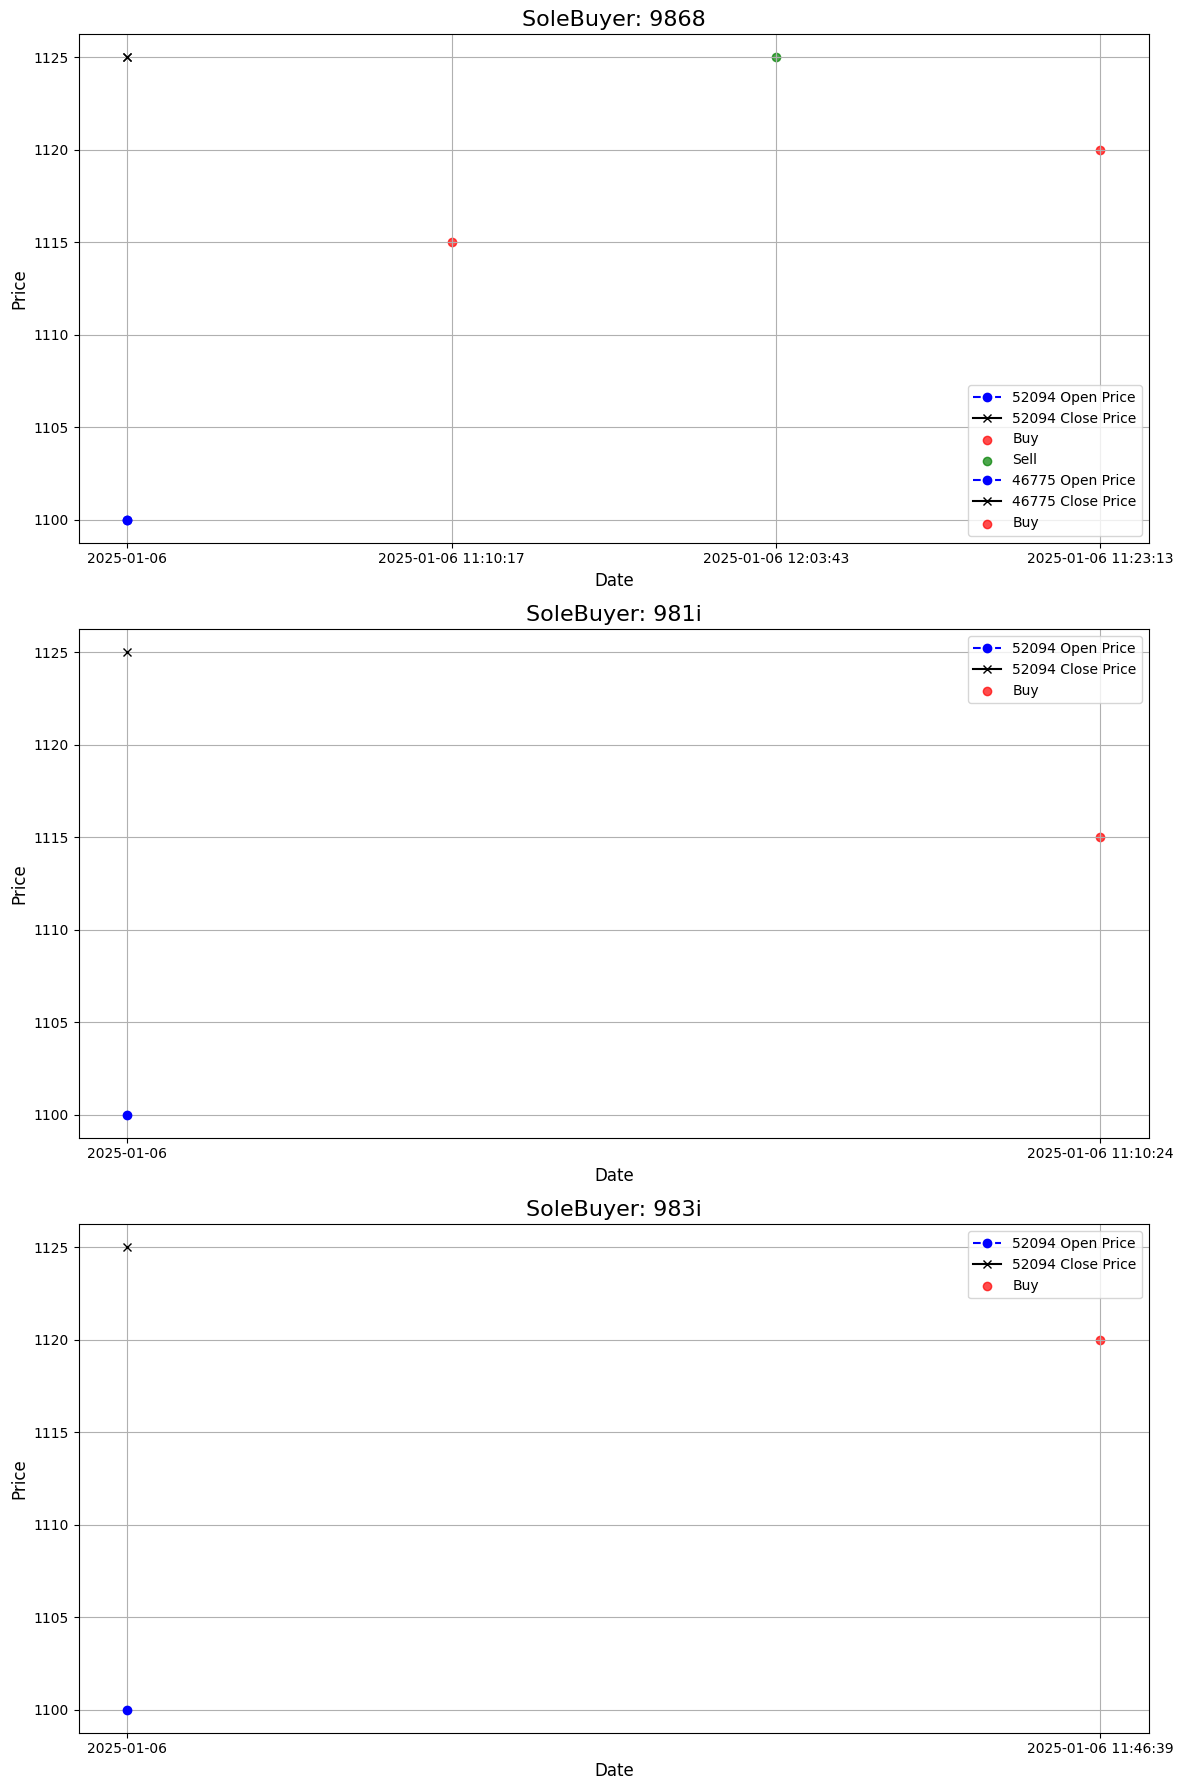

In [153]:
import matplotlib.pyplot as plt
from collections import defaultdict

# 准备数据
daily_prices_data = daily_prices  # 每日开收盘数据
transactions_data = transactions  # 交易数据

# 创建一个多子图
fig, axes = plt.subplots(len(transactions_data), 1, figsize=(12, 6 * len(transactions_data)))

if len(transactions_data) == 1:
    axes = [axes]  # 保证 axes 是可迭代的

# 遍历每个 SoleBuyer
for ax, (sole_buyer, symbols) in zip(axes, transactions_data.items()):
    for symbol, dates in symbols.items():
        # 提取每日开盘价和收盘价
        dates_sorted = sorted(daily_prices_data.keys())
        open_prices = [daily_prices_data[date]['OpenPrice'] for date in dates_sorted]
        close_prices = [daily_prices_data[date]['ClosePrice'] for date in dates_sorted]

        # 绘制开盘价和收盘价
        ax.plot(dates_sorted, open_prices, label=f'{symbol} Open Price', linestyle='--', marker='o', color='blue')
        ax.plot(dates_sorted, close_prices, label=f'{symbol} Close Price', linestyle='-', marker='x', color='black')

        # 绘制买入和卖出价格
        for date, values in dates.items():
            transaction_price = values['Transaction_Sprice(S)']
            if transaction_price is not None:
                # 根据买入或卖出标注不同颜色
                if values['BuyOrSell'] == 'Buy':
                    ax.scatter(date, transaction_price, color='red', label='Buy', alpha=0.7)
                elif values['BuyOrSell'] == 'Sell':
                    ax.scatter(date, transaction_price, color='green', label='Sell', alpha=0.7)

    # 设置标题和图例
    ax.set_title(f'SoleBuyer: {sole_buyer}', fontsize=16)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Price', fontsize=12)
    ax.legend()
    ax.grid()

# 全局调整布局
plt.tight_layout()
plt.show()


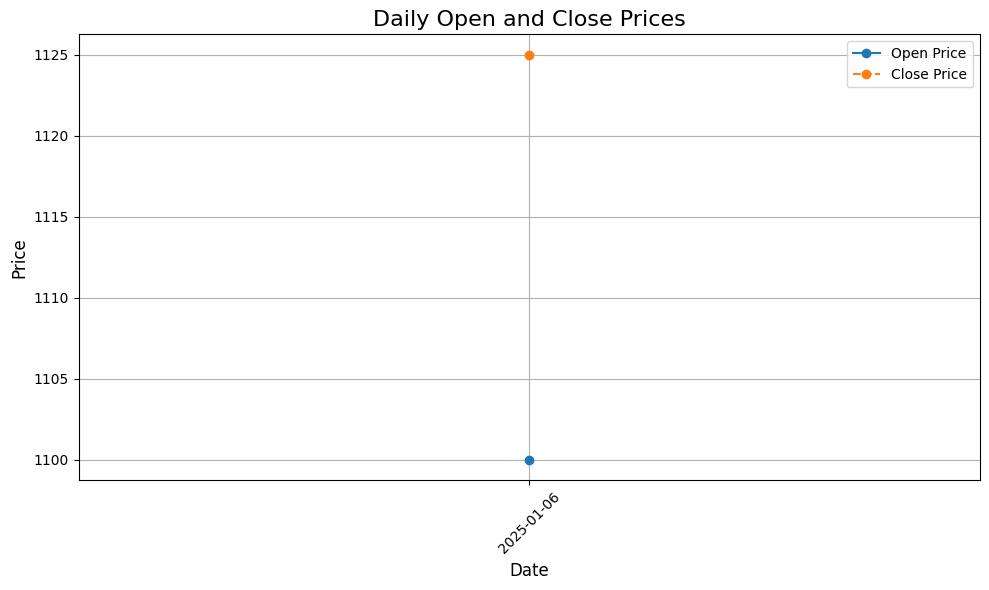

In [152]:
#每日開收盤
dates = list(daily_prices.keys())
open_prices = [daily_prices[date]['OpenPrice'] for date in dates]
close_prices = [daily_prices[date]['ClosePrice'] for date in dates]

plt.figure(figsize=(10, 6))
plt.plot(dates, open_prices, marker='o', label='Open Price')
plt.plot(dates, close_prices, marker='o', label='Close Price', linestyle='--')
plt.title('Daily Open and Close Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


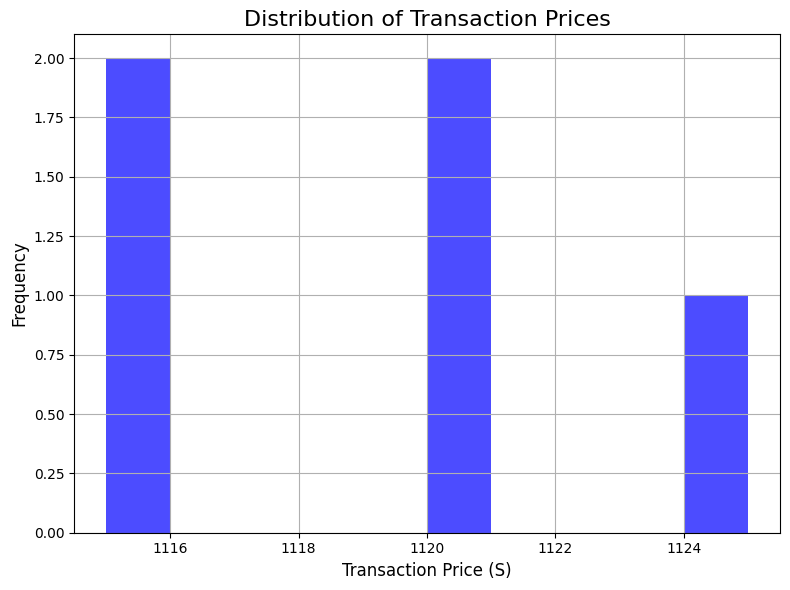

In [159]:
transaction_prices = [
    values['Transaction_Sprice(S)']
    for sole_buyer, symbols in transactions.items()
    for symbol, dates in symbols.items()
    for date, values in dates.items()
    if values['Transaction_Sprice(S)'] is not None
]

# 绘制直方图
plt.figure(figsize=(8, 6))
plt.hist(transaction_prices, bins=10, color='blue', alpha=0.7)
plt.title('Distribution of Transaction Prices', fontsize=16)
plt.xlabel('Transaction Price (S)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()


In [156]:
import plotly.graph_objects as go
# 数据
dates = ['2025-01-06', '2025-01-07', '2025-01-08']
open_prices = [1100, 1150, 1110]
close_prices = [1125, 1130, 1105]

# 绘图
fig = go.Figure()

fig.add_trace(go.Scatter(x=dates, y=open_prices, mode='lines+markers', name='Open Price', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=dates, y=close_prices, mode='lines+markers', name='Close Price', line=dict(color='black')))

# 图表设置
fig.update_layout(
    title='Daily Open and Close Prices',
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Price Type',
    template='plotly_white'
)

# 显示
fig.show()

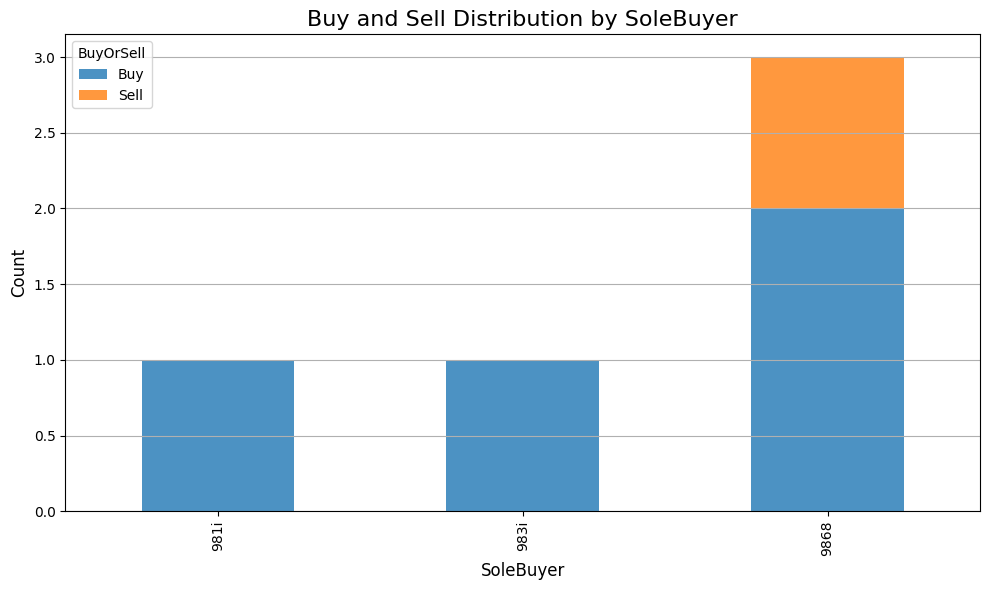

In [160]:
import pandas as pd

# 准备数据
buy_sell_data = []
for sole_buyer, symbols in transactions.items():
    for symbol, dates in symbols.items():
        for date, values in dates.items():
            buy_sell_data.append({
                'SoleBuyer': sole_buyer,
                'BuyOrSell': values['BuyOrSell']
            })

# 转为 DataFrame
df_buy_sell = pd.DataFrame(buy_sell_data)

# 绘制堆叠条形图
buy_sell_counts = df_buy_sell.groupby(['SoleBuyer', 'BuyOrSell']).size().unstack(fill_value=0)
buy_sell_counts.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.8)
plt.title('Buy and Sell Distribution by SoleBuyer', fontsize=16)
plt.xlabel('SoleBuyer', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='BuyOrSell')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


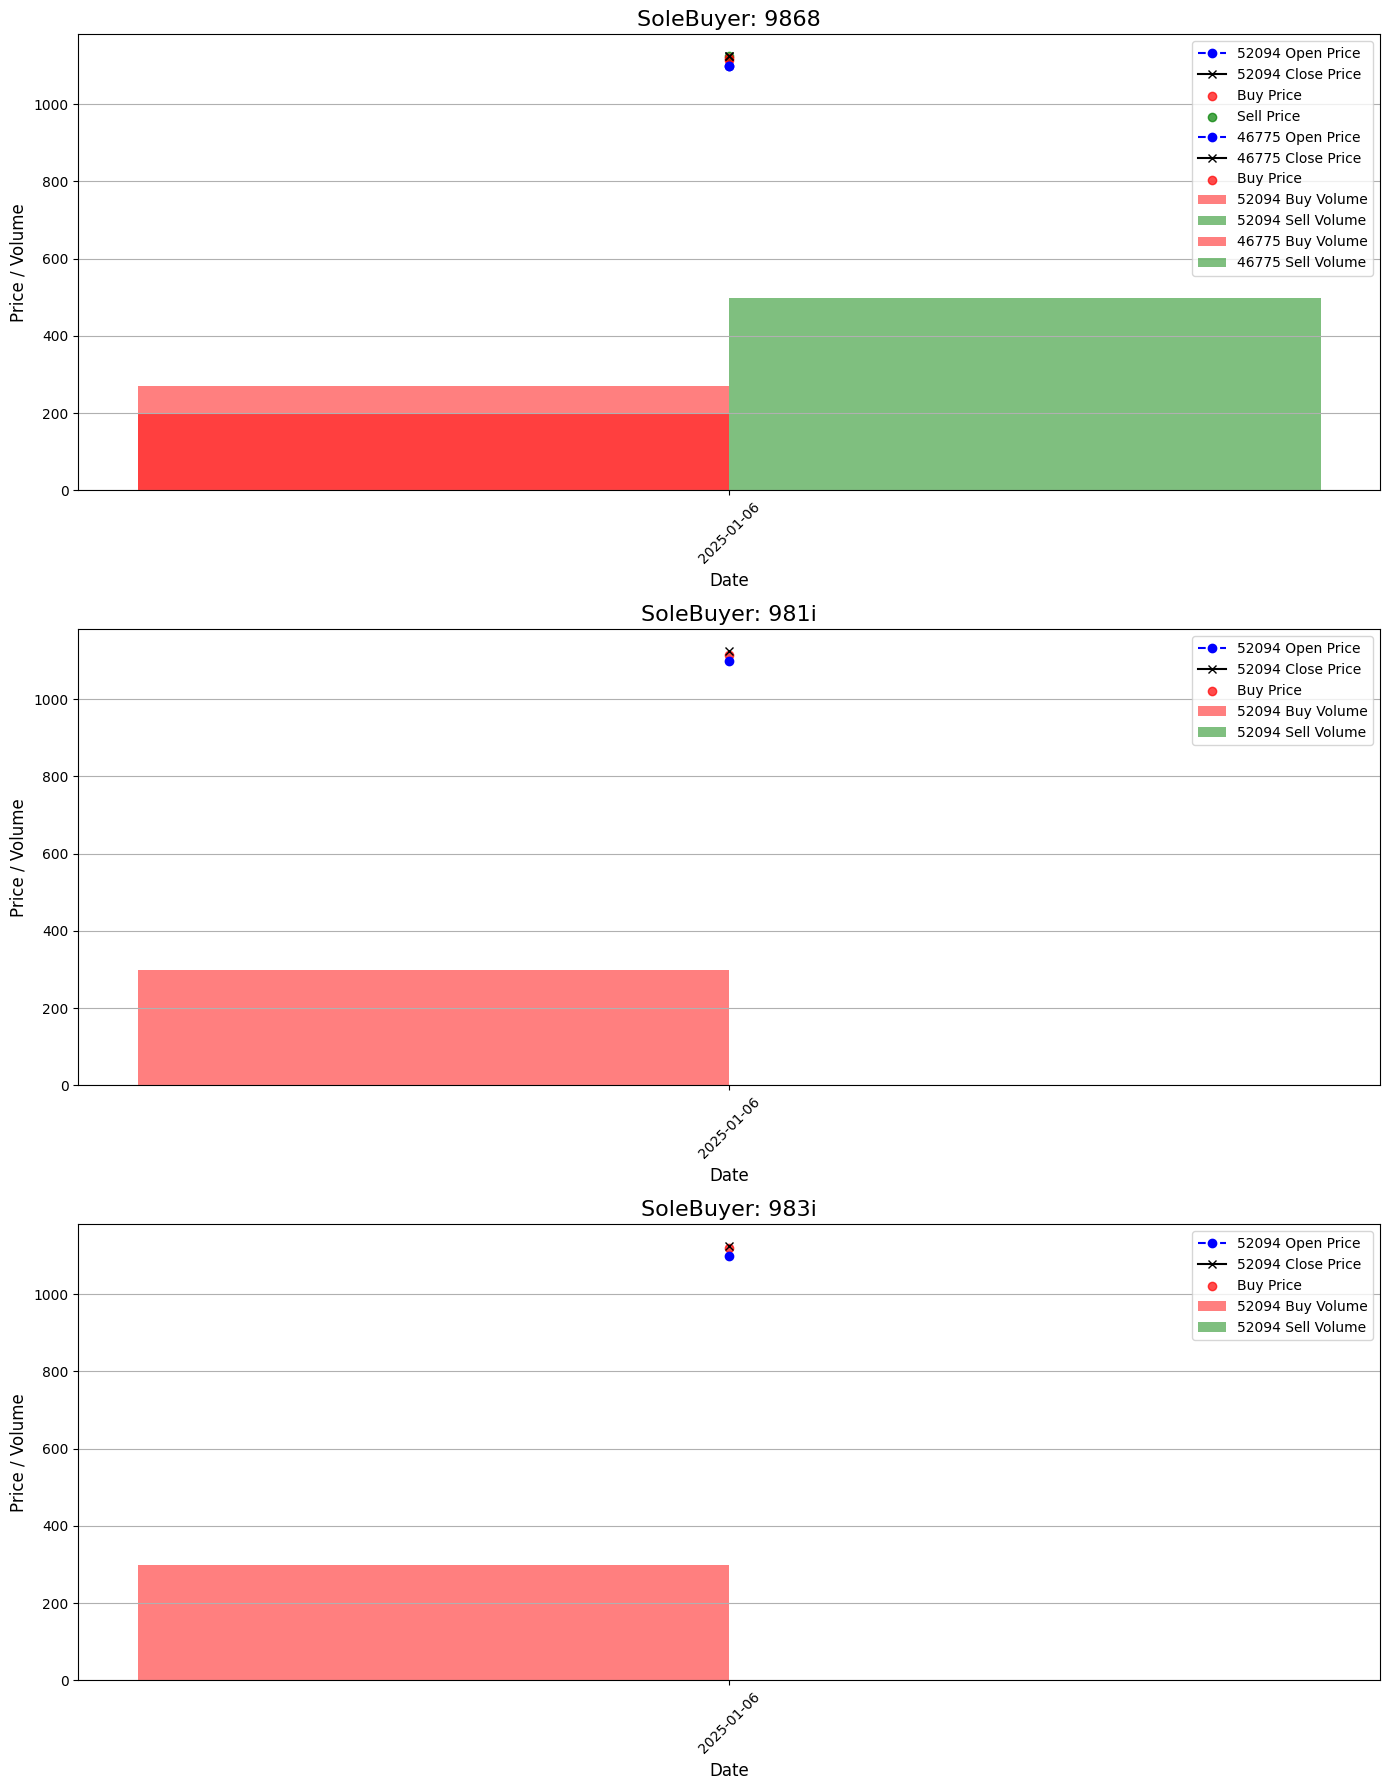

In [164]:
import matplotlib.pyplot as plt
import numpy as np

# 准备数据
daily_prices_data = daily_prices  # 每日开收盘数据
transactions_data = transactions  # 交易数据

# 创建多子图：每个 SoleBuyer 一个子图
fig, axes = plt.subplots(len(transactions_data), 1, figsize=(14, 6 * len(transactions_data)))

if len(transactions_data) == 1:
    axes = [axes]  # 保证 axes 是可迭代的

# 遍历每个 SoleBuyer
for ax, (sole_buyer, symbols) in zip(axes, transactions_data.items()):
    for symbol, dates in symbols.items():
        # 提取每日开盘价和收盘价
        dates_sorted = sorted(daily_prices_data.keys())
        open_prices = [daily_prices_data[date]['OpenPrice'] for date in dates_sorted]
        close_prices = [daily_prices_data[date]['ClosePrice'] for date in dates_sorted]

        # 绘制每日开盘价和收盘价折线图
        ax.plot(dates_sorted, open_prices, label=f'{symbol} Open Price', linestyle='--', marker='o', color='blue')
        ax.plot(dates_sorted, close_prices, label=f'{symbol} Close Price', linestyle='-', marker='x', color='black')

        # 准备每日的买入价格、卖出价格、买入量和卖出量
        buy_prices = []
        sell_prices = []
        buy_volumes = []
        sell_volumes = []
        for date in dates_sorted:
            buy_price = [
                values['Transaction_Sprice(S)']
                for d, values in dates.items()
                if d.startswith(date) and values['BuyOrSell'] == 'Buy'
            ]
            sell_price = [
                values['Transaction_Sprice(S)']
                for d, values in dates.items()
                if d.startswith(date) and values['BuyOrSell'] == 'Sell'
            ]
            buy_volume = sum(
                values['Volume']
                for d, values in dates.items()
                if d.startswith(date) and values['BuyOrSell'] == 'Buy'
            )
            sell_volume = sum(
                values['Volume']
                for d, values in dates.items()
                if d.startswith(date) and values['BuyOrSell'] == 'Sell'
            )
            # 记录价格和量
            buy_prices.append(buy_price if buy_price else [None])
            sell_prices.append(sell_price if sell_price else [None])
            buy_volumes.append(buy_volume)
            sell_volumes.append(sell_volume)

        # 绘制买入和卖出价格的散点图
        for i, date in enumerate(dates_sorted):
            for bp in buy_prices[i]:
                if bp is not None:
                    ax.scatter(date, bp, color='red', label='Buy Price', alpha=0.7)
            for sp in sell_prices[i]:
                if sp is not None:
                    ax.scatter(date, sp, color='green', label='Sell Price', alpha=0.7)

        # 绘制买入和卖出量的柱状图
        x = np.arange(len(dates_sorted))  # 日期对应的 x 坐标
        ax.bar(x - 0.2, buy_volumes, width=0.4, color='red', label=f'{symbol} Buy Volume', alpha=0.5)
        ax.bar(x + 0.2, sell_volumes, width=0.4, color='green', label=f'{symbol} Sell Volume', alpha=0.5)

    # 设置图表标题、轴标签和图例
    ax.set_title(f'SoleBuyer: {sole_buyer}', fontsize=16)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Price / Volume', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(dates_sorted, rotation=45)
    ax.legend()
    ax.grid(axis='y')

# 调整整体布局
plt.tight_layout()
plt.show()


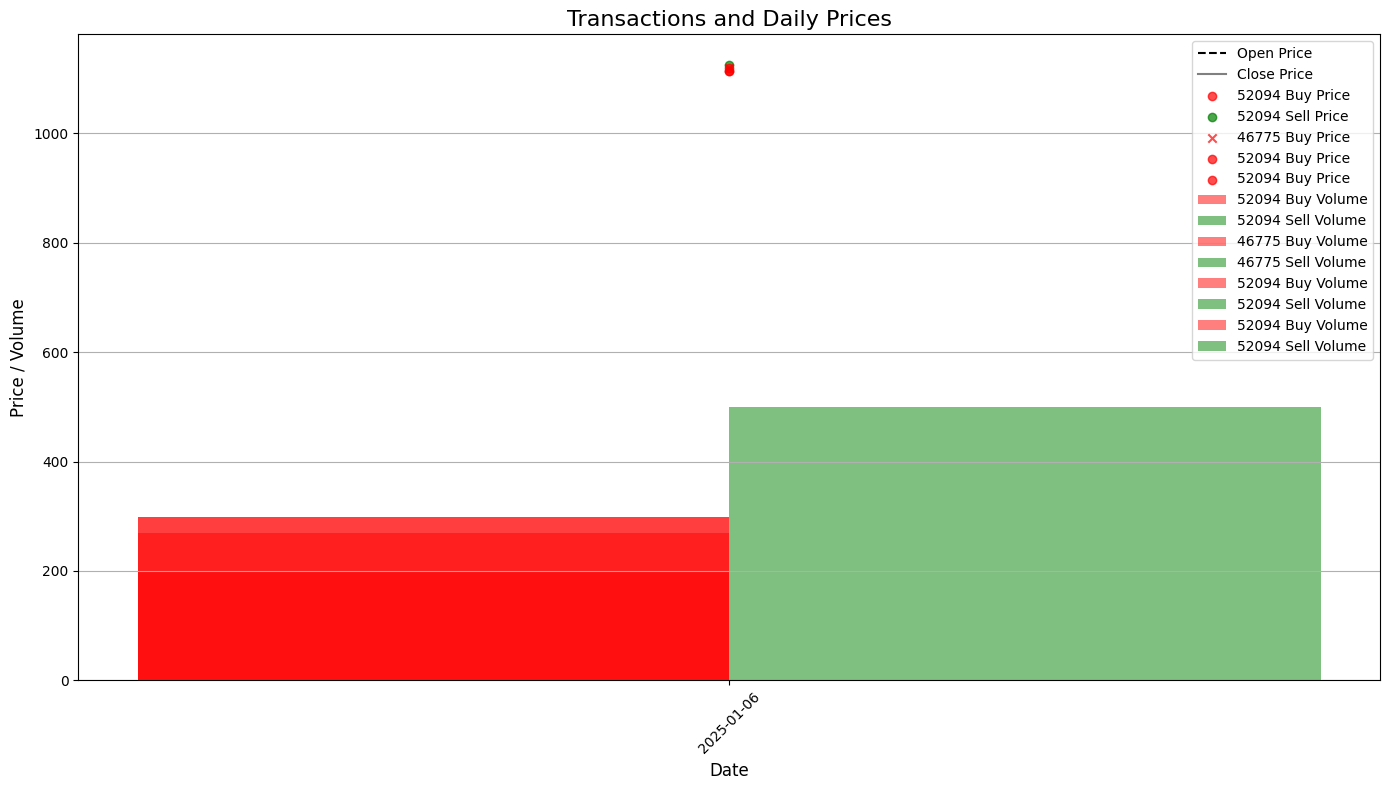

In [165]:
import matplotlib.pyplot as plt
import numpy as np

# 准备数据
daily_prices_data = daily_prices  # 每日开收盘数据
transactions_data = transactions  # 交易数据

# 创建颜色和标记样式
colors = ['blue', 'orange', 'green', 'purple', 'red']
markers = ['o', 'x', '^', 's', 'D']

# 初始化图表
fig, ax = plt.subplots(figsize=(14, 8))

# 用于标记已使用的 `SoleBuyer` 和 `Symbol` 的颜色和样式
symbol_styles = {}

# 提取每日开盘价和收盘价
dates_sorted = sorted(daily_prices_data.keys())
open_prices = [daily_prices_data[date]['OpenPrice'] for date in dates_sorted]
close_prices = [daily_prices_data[date]['ClosePrice'] for date in dates_sorted]

# 绘制每日开盘价和收盘价折线图
ax.plot(dates_sorted, open_prices, label='Open Price', linestyle='--', color='black')
ax.plot(dates_sorted, close_prices, label='Close Price', linestyle='-', color='grey')

# 遍历所有 SoleBuyer 和 Symbol
for sole_buyer, symbols in transactions_data.items():
    for symbol, dates in symbols.items():
        # 分配颜色和标记样式
        if symbol not in symbol_styles:
            style_index = len(symbol_styles) % len(colors)
            symbol_styles[symbol] = (colors[style_index], markers[style_index])
        color, marker = symbol_styles[symbol]

        # 准备买入价格、卖出价格、买入量和卖出量
        buy_prices = []
        sell_prices = []
        buy_volumes = []
        sell_volumes = []
        for date in dates_sorted:
            buy_price = [
                values['Transaction_Sprice(S)']
                for d, values in dates.items()
                if d.startswith(date) and values['BuyOrSell'] == 'Buy'
            ]
            sell_price = [
                values['Transaction_Sprice(S)']
                for d, values in dates.items()
                if d.startswith(date) and values['BuyOrSell'] == 'Sell'
            ]
            buy_volume = sum(
                values['Volume']
                for d, values in dates.items()
                if d.startswith(date) and values['BuyOrSell'] == 'Buy'
            )
            sell_volume = sum(
                values['Volume']
                for d, values in dates.items()
                if d.startswith(date) and values['BuyOrSell'] == 'Sell'
            )
            # 记录价格和量
            buy_prices.append(buy_price if buy_price else [None])
            sell_prices.append(sell_price if sell_price else [None])
            buy_volumes.append(buy_volume)
            sell_volumes.append(sell_volume)

        # 绘制买入和卖出价格的散点图
        for i, date in enumerate(dates_sorted):
            for bp in buy_prices[i]:
                if bp is not None:
                    ax.scatter(date, bp, color='red', label=f'{symbol} Buy Price', alpha=0.7, marker=marker)
            for sp in sell_prices[i]:
                if sp is not None:
                    ax.scatter(date, sp, color='green', label=f'{symbol} Sell Price', alpha=0.7, marker=marker)

        # 绘制买入和卖出量的柱状图
        x = np.arange(len(dates_sorted))  # 日期对应的 x 坐标
        ax.bar(x - 0.2, buy_volumes, width=0.4, color='red', alpha=0.5, label=f'{symbol} Buy Volume')
        ax.bar(x + 0.2, sell_volumes, width=0.4, color='green', alpha=0.5, label=f'{symbol} Sell Volume')

# 设置图表标题、轴标签和图例
ax.set_title('Transactions and Daily Prices', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price / Volume', fontsize=12)
ax.set_xticks(np.arange(len(dates_sorted)))
ax.set_xticklabels(dates_sorted, rotation=45)
ax.legend()
ax.grid(axis='y')

# 调整布局
plt.tight_layout()
plt.show()


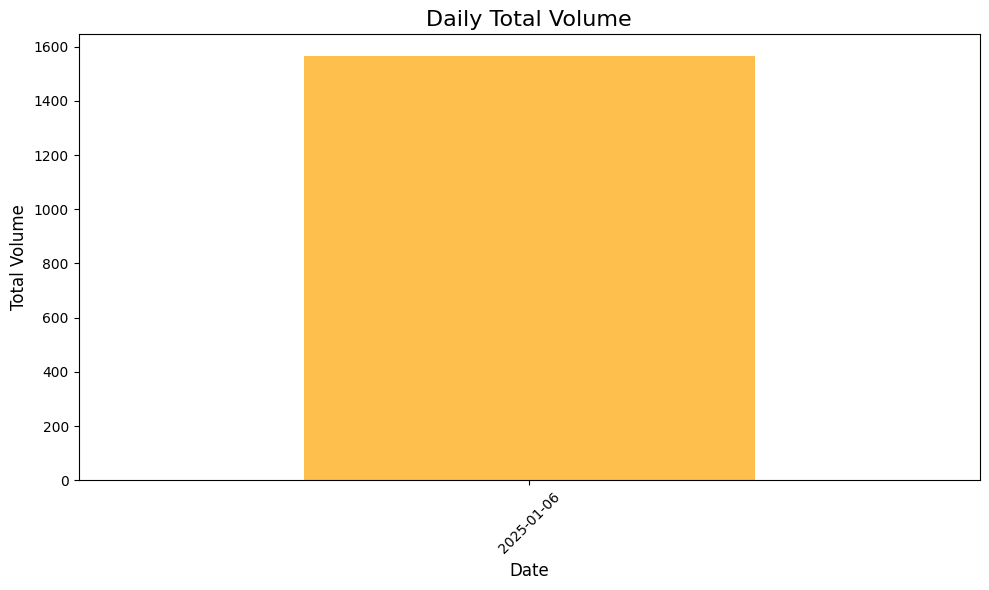

In [161]:
volume_data = []
for sole_buyer, symbols in transactions.items():
    for symbol, dates in symbols.items():
        for date, values in dates.items():
            volume_data.append({
                'Date': date.split(" ")[0],
                'Volume': values['Volume']
            })

# 转为 DataFrame
df_volume = pd.DataFrame(volume_data)

# 按日期汇总成交量
daily_volumes = df_volume.groupby('Date')['Volume'].sum()

# 绘制柱状图
plt.figure(figsize=(10, 6))
daily_volumes.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Daily Total Volume', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Volume', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


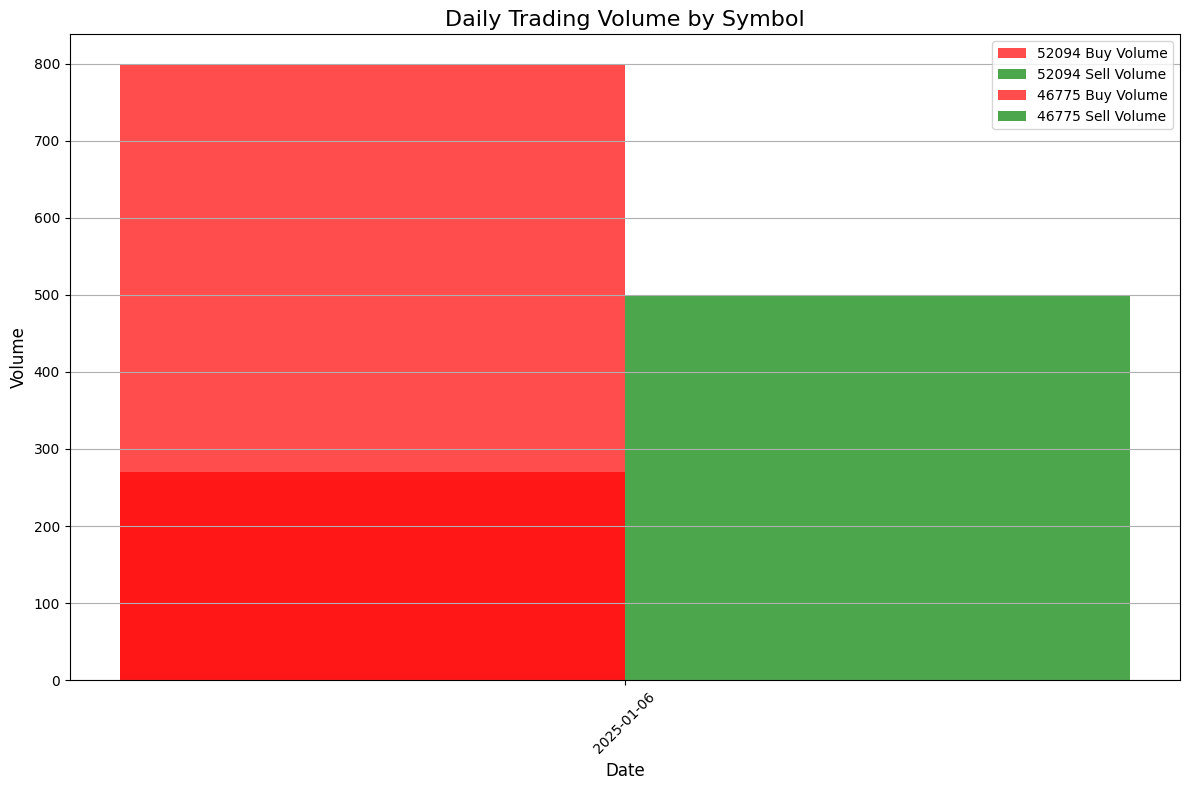

In [166]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# 准备数据
daily_volumes = defaultdict(lambda: {"Buy": defaultdict(int), "Sell": defaultdict(int)})

# 聚合数据：按 Symbol 和 Date 统计买入和卖出量
for sole_buyer, symbols in transactions.items():
    for symbol, dates in symbols.items():
        for date, values in dates.items():
            day = date.split(" ")[0]  # 提取日期部分
            if values["BuyOrSell"] == "Buy":
                daily_volumes[symbol]["Buy"][day] += values["Volume"]
            elif values["BuyOrSell"] == "Sell":
                daily_volumes[symbol]["Sell"][day] += values["Volume"]

# 创建图表
fig, ax = plt.subplots(figsize=(12, 8))

# 遍历每个 Symbol 绘制
for symbol, data in daily_volumes.items():
    # 提取日期、买入量和卖出量
    dates = sorted(set(data["Buy"].keys()).union(set(data["Sell"].keys())))
    buy_volumes = [data["Buy"].get(date, 0) for date in dates]
    sell_volumes = [data["Sell"].get(date, 0) for date in dates]

    x = np.arange(len(dates))  # 日期的 x 坐标

    # 绘制买入和卖出量的柱状图
    ax.bar(x - 0.2, buy_volumes, width=0.4, color='red', label=f'{symbol} Buy Volume', alpha=0.7)
    ax.bar(x + 0.2, sell_volumes, width=0.4, color='green', label=f'{symbol} Sell Volume', alpha=0.7)

# 设置图表标题、轴标签和图例
ax.set_title('Daily Trading Volume by Symbol', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Volume', fontsize=12)
ax.set_xticks(np.arange(len(dates)))
ax.set_xticklabels(dates, rotation=45)
ax.legend()
ax.grid(axis='y')

# 调整布局
plt.tight_layout()
plt.show()

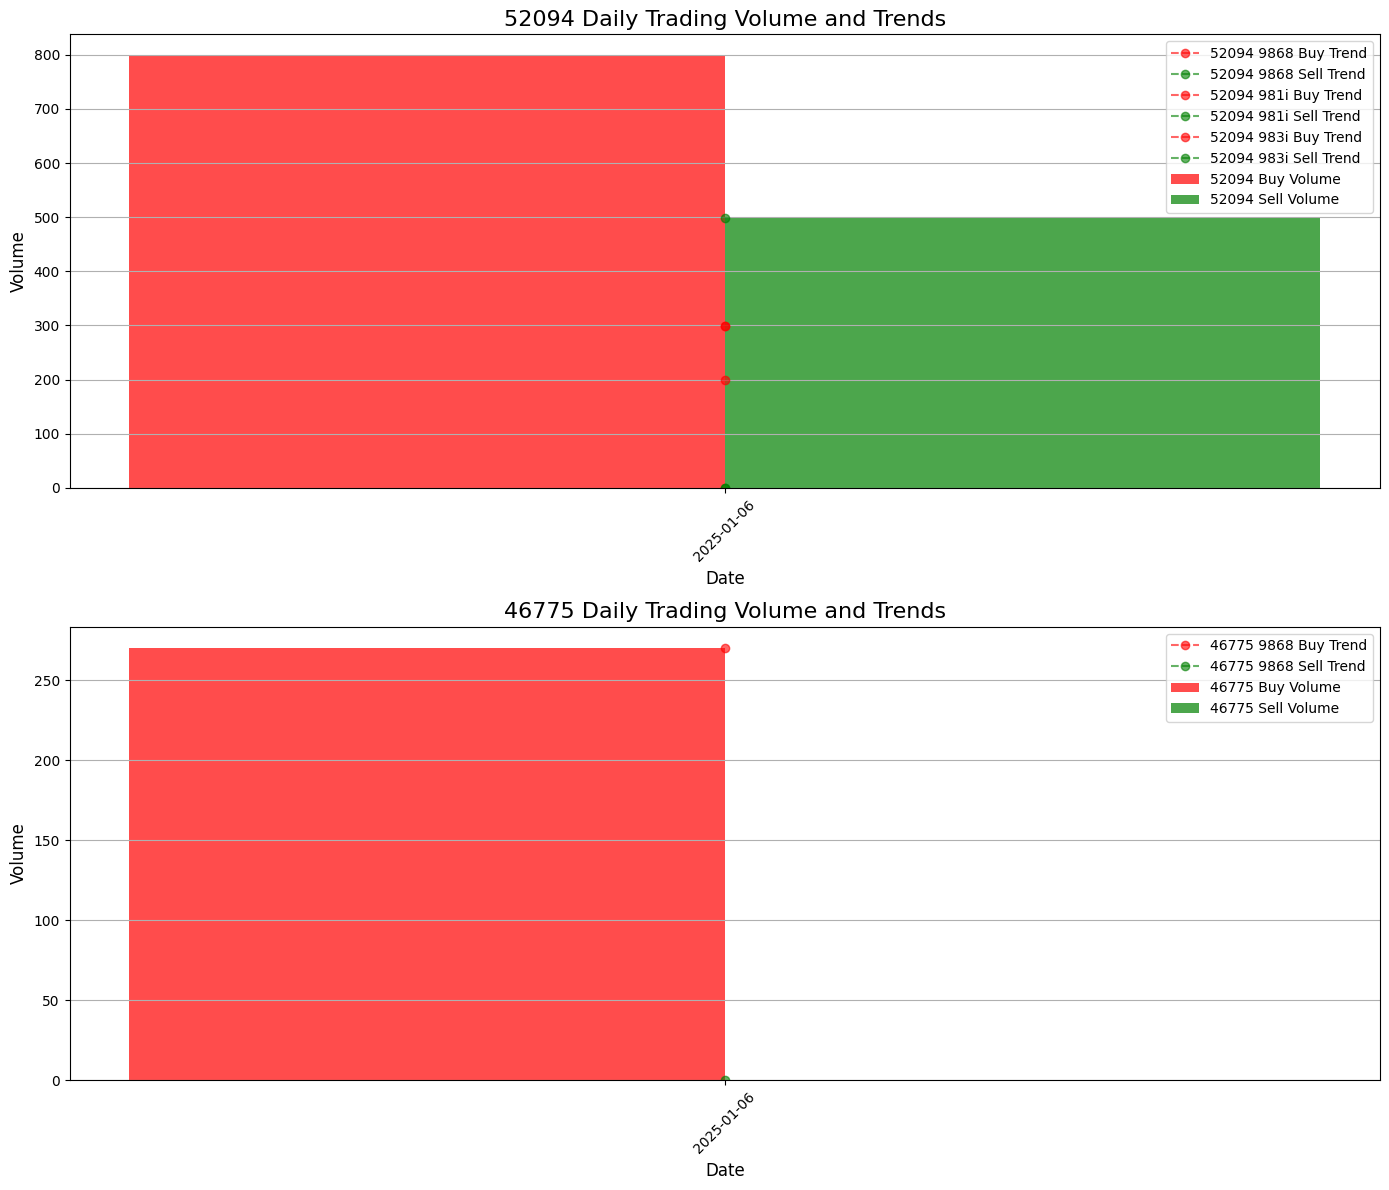

In [168]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# 准备数据
daily_volumes = defaultdict(lambda: {"Buy": defaultdict(int), "Sell": defaultdict(int)})
solebuyer_volumes = defaultdict(lambda: defaultdict(lambda: {"Buy": defaultdict(int), "Sell": defaultdict(int)}))

# 聚合数据：按 Symbol 和 Date 统计买入和卖出量，同时统计每个 SoleBuyer 的买入和卖出
for sole_buyer, symbols in transactions.items():
    for symbol, dates in symbols.items():
        for date, values in dates.items():
            day = date.split(" ")[0]  # 提取日期部分
            if values["BuyOrSell"] == "Buy":
                daily_volumes[symbol]["Buy"][day] += values["Volume"]
                solebuyer_volumes[symbol][sole_buyer]["Buy"][day] += values["Volume"]
            elif values["BuyOrSell"] == "Sell":
                daily_volumes[symbol]["Sell"][day] += values["Volume"]
                solebuyer_volumes[symbol][sole_buyer]["Sell"][day] += values["Volume"]

# 创建图表
fig, axes = plt.subplots(len(daily_volumes), 1, figsize=(14, 6 * len(daily_volumes)))

if len(daily_volumes) == 1:
    axes = [axes]  # 保证 axes 是可迭代的

# 遍历每个 Symbol 绘制
for (symbol, data), ax in zip(daily_volumes.items(), axes):
    # 提取日期、买入量和卖出量
    dates = sorted(set(data["Buy"].keys()).union(set(data["Sell"].keys())))
    buy_volumes = [data["Buy"].get(date, 0) for date in dates]
    sell_volumes = [data["Sell"].get(date, 0) for date in dates]

    x = np.arange(len(dates))  # 日期的 x 坐标

    # 主图：绘制买入和卖出量的柱状图
    ax.bar(x - 0.2, buy_volumes, width=0.4, color='red', label=f'{symbol} Buy Volume', alpha=0.7)
    ax.bar(x + 0.2, sell_volumes, width=0.4, color='green', label=f'{symbol} Sell Volume', alpha=0.7)

    # 绘制每个 SoleBuyer 的买入与卖出数量折线图
    for sole_buyer, sb_data in solebuyer_volumes[symbol].items():
        solebuyer_buy_volumes = [sb_data["Buy"].get(date, 0) for date in dates]
        solebuyer_sell_volumes = [sb_data["Sell"].get(date, 0) for date in dates]

        # 绘制买入折线
        ax.plot(
            dates,
            solebuyer_buy_volumes,
            label=f'{symbol} {sole_buyer} Buy Trend',
            linestyle='--',
            marker='o',
            color='red',
            alpha=0.6,
        )

        # 绘制卖出折线
        ax.plot(
            dates,
            solebuyer_sell_volumes,
            label=f'{symbol} {sole_buyer} Sell Trend',
            linestyle='--',
            marker='o',
            color='green',
            alpha=0.6,
        )

    # 设置主图标题、标签和图例
    ax.set_title(f'{symbol} Daily Trading Volume and Trends', fontsize=16)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Volume', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(dates, rotation=45)
    ax.legend()
    ax.grid(axis='y')

# 调整布局
plt.tight_layout()
plt.show()



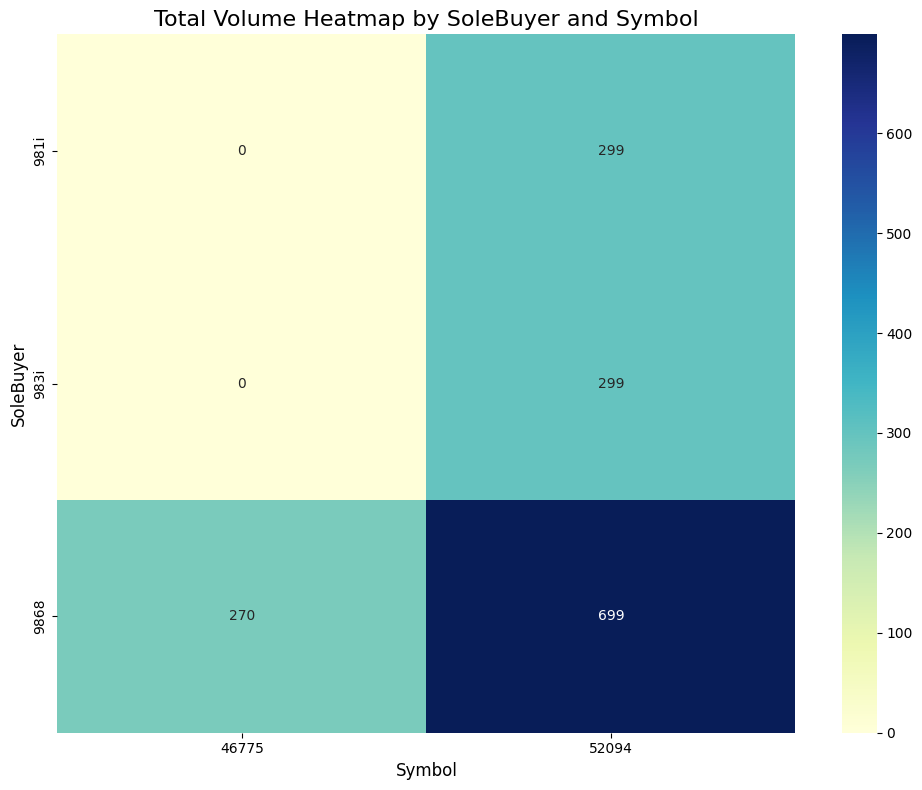

In [162]:
import seaborn as sns

# 准备数据
heatmap_data = []
for sole_buyer, symbols in transactions.items():
    for symbol, dates in symbols.items():
        total_volume = sum(values['Volume'] for values in dates.values())
        heatmap_data.append({
            'SoleBuyer': sole_buyer,
            'Symbol': symbol,
            'TotalVolume': total_volume
        })

# 转为 DataFrame
df_heatmap = pd.DataFrame(heatmap_data)

# 创建透视表
pivot_table = df_heatmap.pivot_table(index='SoleBuyer', columns='Symbol', values='TotalVolume', aggfunc='sum', fill_value=0)

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Total Volume Heatmap by SoleBuyer and Symbol', fontsize=16)
plt.xlabel('Symbol', fontsize=12)
plt.ylabel('SoleBuyer', fontsize=12)
plt.tight_layout()
plt.show()


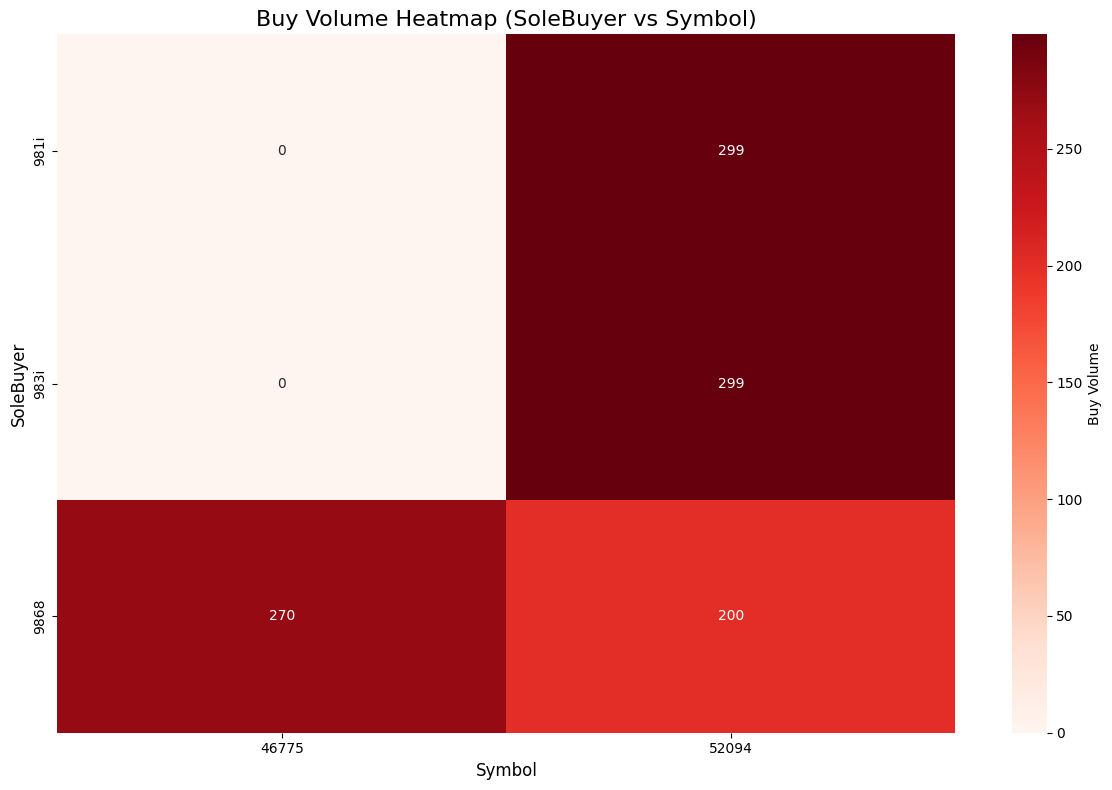

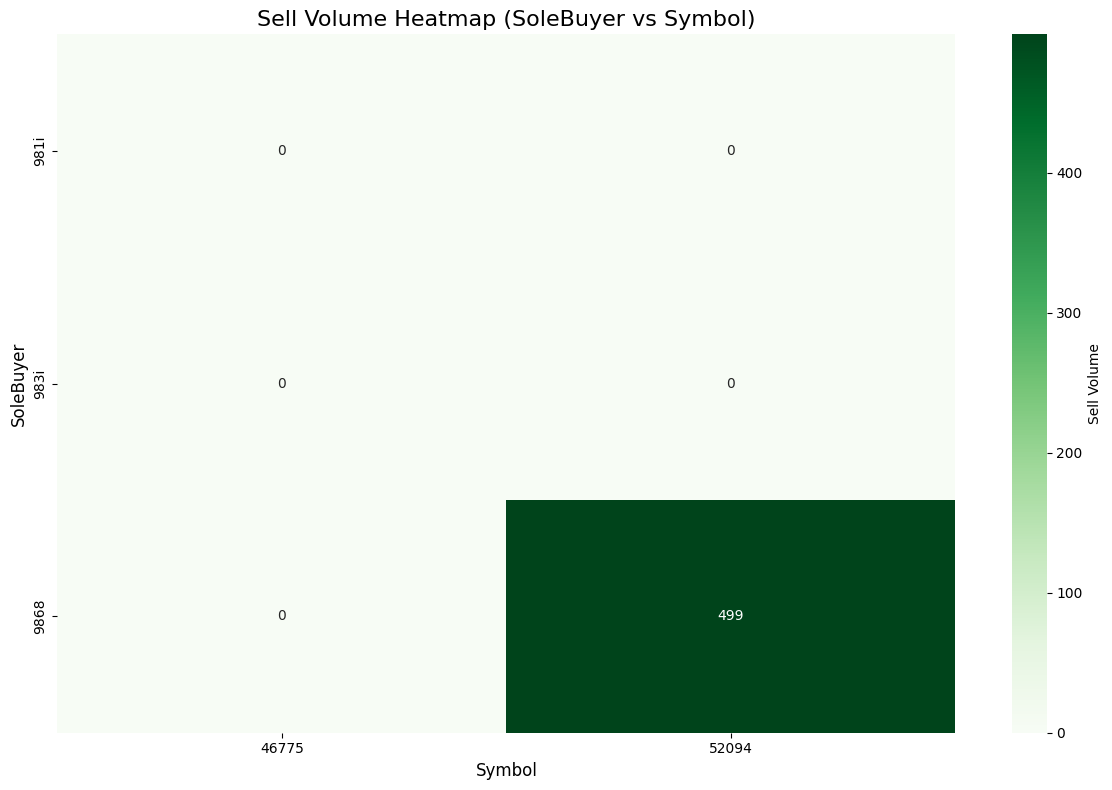

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 准备数据：统计每个 SoleBuyer 和 Symbol 的总买入量和卖出量
heatmap_data = defaultdict(lambda: {"Buy": 0, "Sell": 0})
for sole_buyer, symbols in transactions.items():
    for symbol, dates in symbols.items():
        for date, values in dates.items():
            if values["BuyOrSell"] == "Buy":
                heatmap_data[(sole_buyer, symbol)]["Buy"] += values["Volume"]
            elif values["BuyOrSell"] == "Sell":
                heatmap_data[(sole_buyer, symbol)]["Sell"] += values["Volume"]

# 转为 DataFrame
heatmap_df = pd.DataFrame(
    [
        {"SoleBuyer": k[0], "Symbol": k[1], "BuyVolume": v["Buy"], "SellVolume": v["Sell"]}
        for k, v in heatmap_data.items()
    ]
)

# 创建透视表
pivot_table_buy = heatmap_df.pivot(index="SoleBuyer", columns="Symbol", values="BuyVolume").fillna(0)
pivot_table_sell = heatmap_df.pivot(index="SoleBuyer", columns="Symbol", values="SellVolume").fillna(0)

# 绘制买入量热力图
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_buy, annot=True, fmt=".0f", cmap="Reds", cbar_kws={"label": "Buy Volume"})
plt.title("Buy Volume Heatmap (SoleBuyer vs Symbol)", fontsize=16)
plt.xlabel("Symbol", fontsize=12)
plt.ylabel("SoleBuyer", fontsize=12)
plt.tight_layout()
plt.show()

# 绘制卖出量热力图
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_sell, annot=True, fmt=".0f", cmap="Greens", cbar_kws={"label": "Sell Volume"})
plt.title("Sell Volume Heatmap (SoleBuyer vs Symbol)", fontsize=16)
plt.xlabel("Symbol", fontsize=12)
plt.ylabel("SoleBuyer", fontsize=12)
plt.tight_layout()
plt.show()


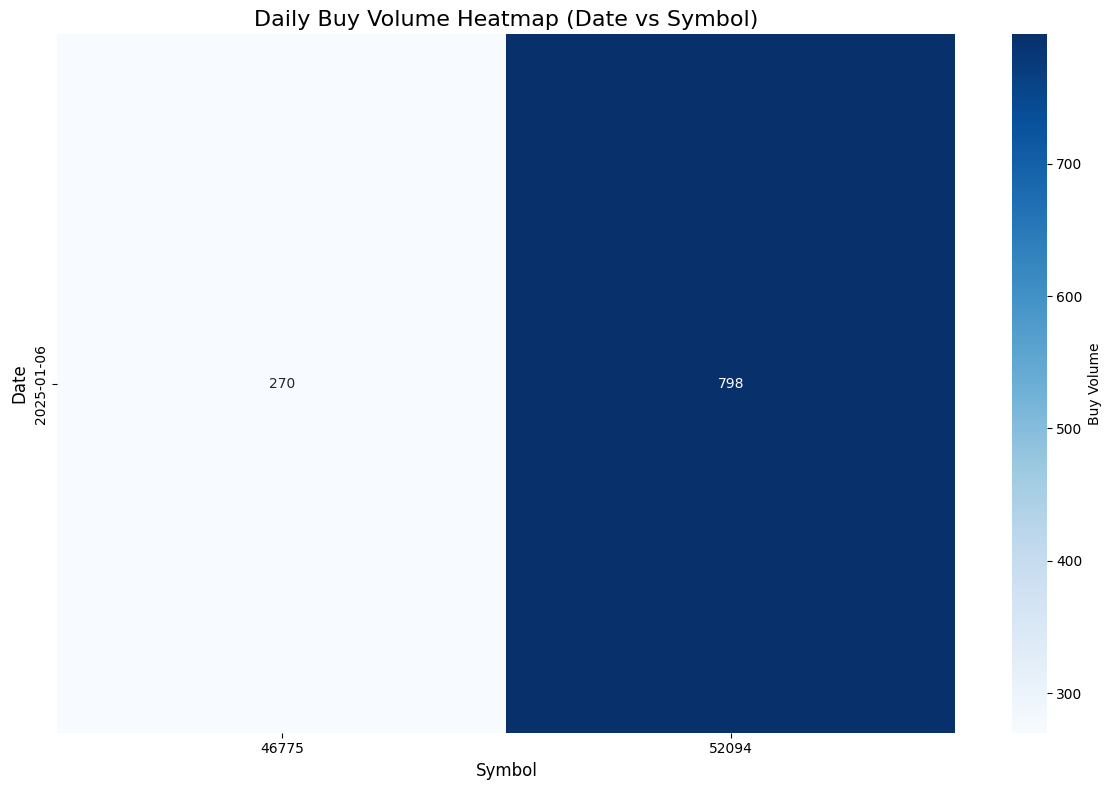

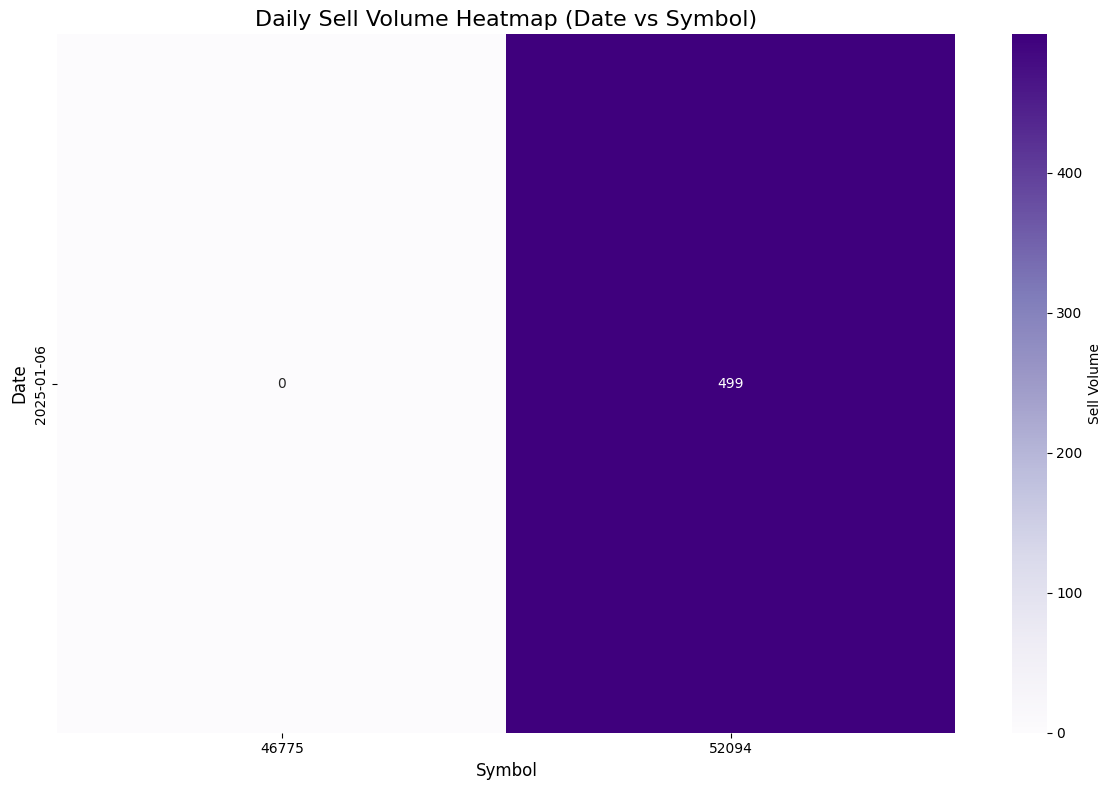

In [170]:
# 准备数据：按日期和 Symbol 聚合买入和卖出量
daily_heatmap_data = defaultdict(lambda: {"Buy": 0, "Sell": 0})
for sole_buyer, symbols in transactions.items():
    for symbol, dates in symbols.items():
        for date, values in dates.items():
            day = date.split(" ")[0]
            if values["BuyOrSell"] == "Buy":
                daily_heatmap_data[(day, symbol)]["Buy"] += values["Volume"]
            elif values["BuyOrSell"] == "Sell":
                daily_heatmap_data[(day, symbol)]["Sell"] += values["Volume"]

# 转为 DataFrame
daily_heatmap_df = pd.DataFrame(
    [
        {"Date": k[0], "Symbol": k[1], "BuyVolume": v["Buy"], "SellVolume": v["Sell"]}
        for k, v in daily_heatmap_data.items()
    ]
)

# 创建透视表
pivot_table_daily_buy = daily_heatmap_df.pivot(index="Date", columns="Symbol", values="BuyVolume").fillna(0)
pivot_table_daily_sell = daily_heatmap_df.pivot(index="Date", columns="Symbol", values="SellVolume").fillna(0)

# 绘制每日买入量热力图
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_daily_buy, annot=True, fmt=".0f", cmap="Blues", cbar_kws={"label": "Buy Volume"})
plt.title("Daily Buy Volume Heatmap (Date vs Symbol)", fontsize=16)
plt.xlabel("Symbol", fontsize=12)
plt.ylabel("Date", fontsize=12)
plt.tight_layout()
plt.show()

# 绘制每日卖出量热力图
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_daily_sell, annot=True, fmt=".0f", cmap="Purples", cbar_kws={"label": "Sell Volume"})
plt.title("Daily Sell Volume Heatmap (Date vs Symbol)", fontsize=16)
plt.xlabel("Symbol", fontsize=12)
plt.ylabel("Date", fontsize=12)
plt.tight_layout()
plt.show()


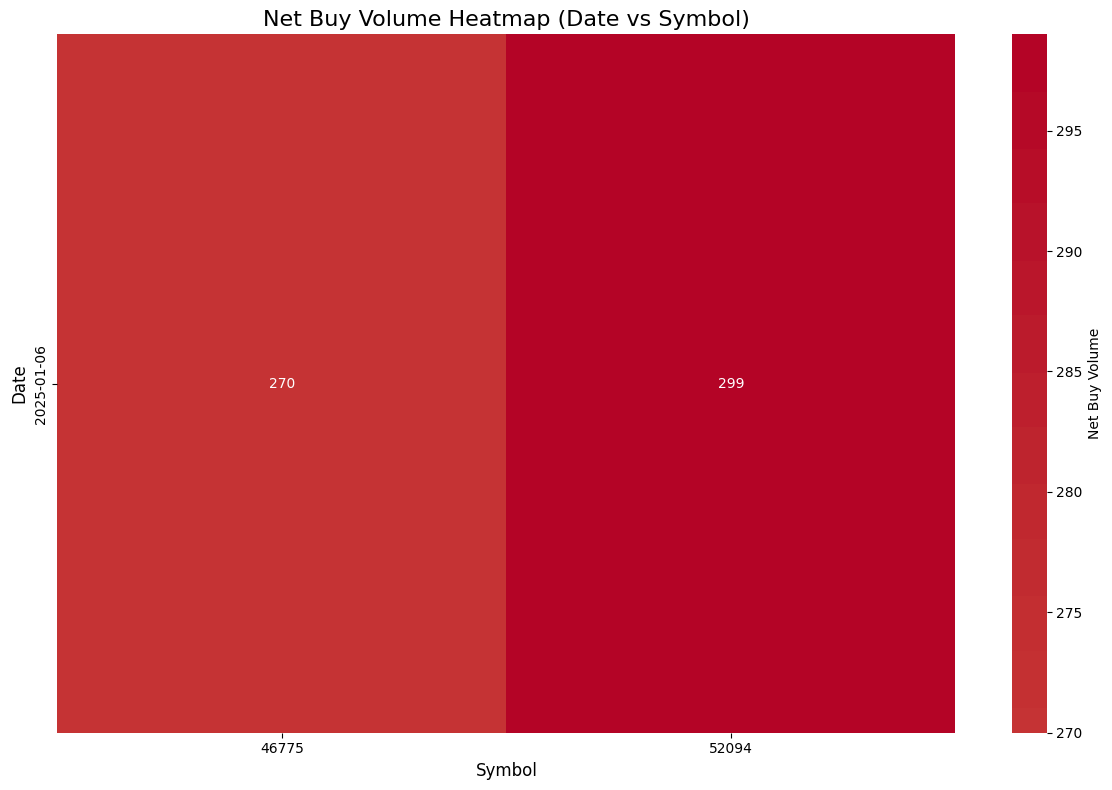

In [171]:
# 准备净买入量数据
daily_net_data = defaultdict(int)
for sole_buyer, symbols in transactions.items():
    for symbol, dates in symbols.items():
        for date, values in dates.items():
            day = date.split(" ")[0]
            if values["BuyOrSell"] == "Buy":
                daily_net_data[(day, symbol)] += values["Volume"]
            elif values["BuyOrSell"] == "Sell":
                daily_net_data[(day, symbol)] -= values["Volume"]

# 转为 DataFrame
net_df = pd.DataFrame(
    [
        {"Date": k[0], "Symbol": k[1], "NetBuyVolume": v}
        for k, v in daily_net_data.items()
    ]
)

# 创建透视表
pivot_table_net = net_df.pivot(index="Date", columns="Symbol", values="NetBuyVolume").fillna(0)

# 绘制净买入量热力图
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_net, annot=True, fmt=".0f", cmap="coolwarm", center=0, cbar_kws={"label": "Net Buy Volume"})
plt.title("Net Buy Volume Heatmap (Date vs Symbol)", fontsize=16)
plt.xlabel("Symbol", fontsize=12)
plt.ylabel("Date", fontsize=12)
plt.tight_layout()
plt.show()


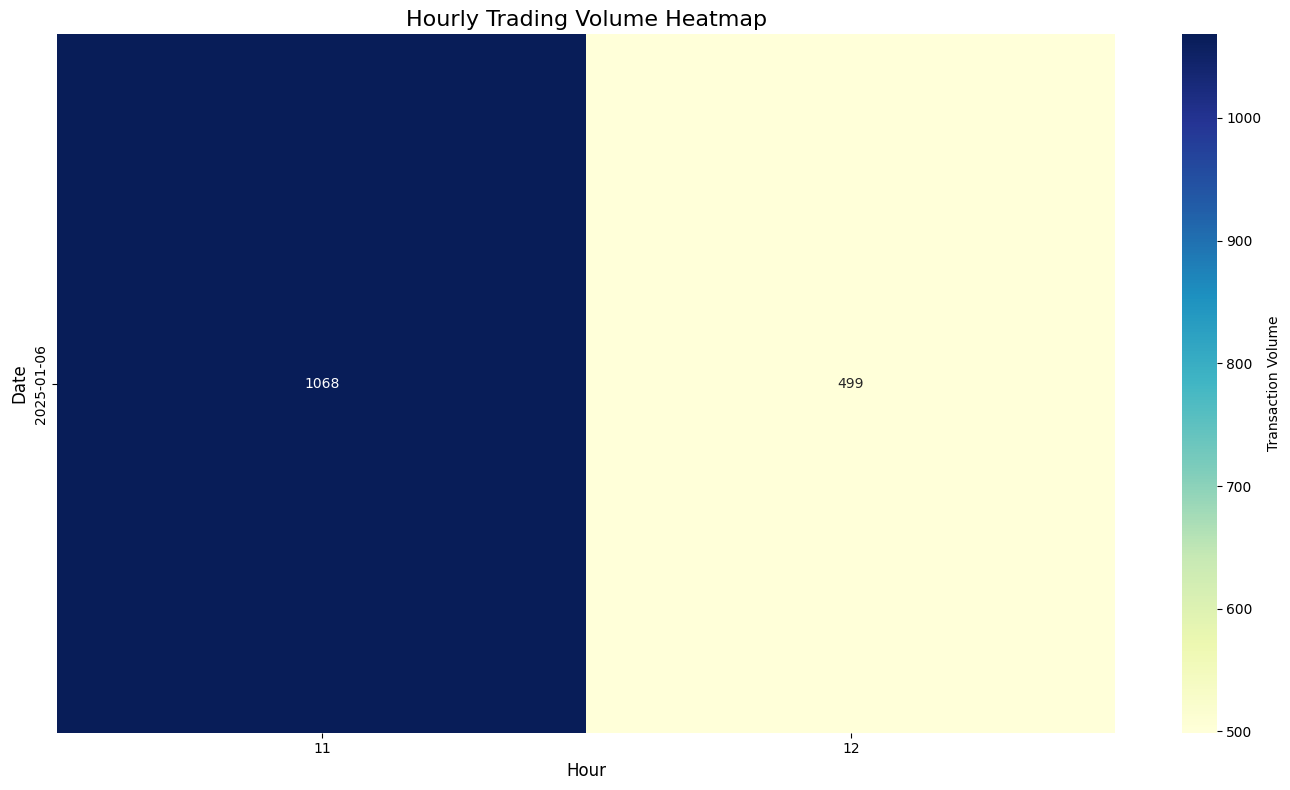

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

# 准备数据：按日期和小时聚合买入和卖出量
time_heatmap_data = defaultdict(int)
for sole_buyer, symbols in transactions.items():
    for symbol, dates in symbols.items():
        for datetime, values in dates.items():
            date, time = datetime.split(" ")
            hour = time.split(":")[0]  # 提取小时
            time_key = (date, hour)
            time_heatmap_data[time_key] += values["Volume"]

# 转为 DataFrame
heatmap_df = pd.DataFrame(
    [{"Date": k[0], "Hour": k[1], "Volume": v} for k, v in time_heatmap_data.items()]
)

# 创建透视表：行是日期，列是小时
pivot_table = heatmap_df.pivot(index="Date", columns="Hour", values="Volume").fillna(0)

# 绘制热力图
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={"label": "Transaction Volume"})
plt.title("Hourly Trading Volume Heatmap", fontsize=16)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Date", fontsize=12)
plt.tight_layout()
plt.show()


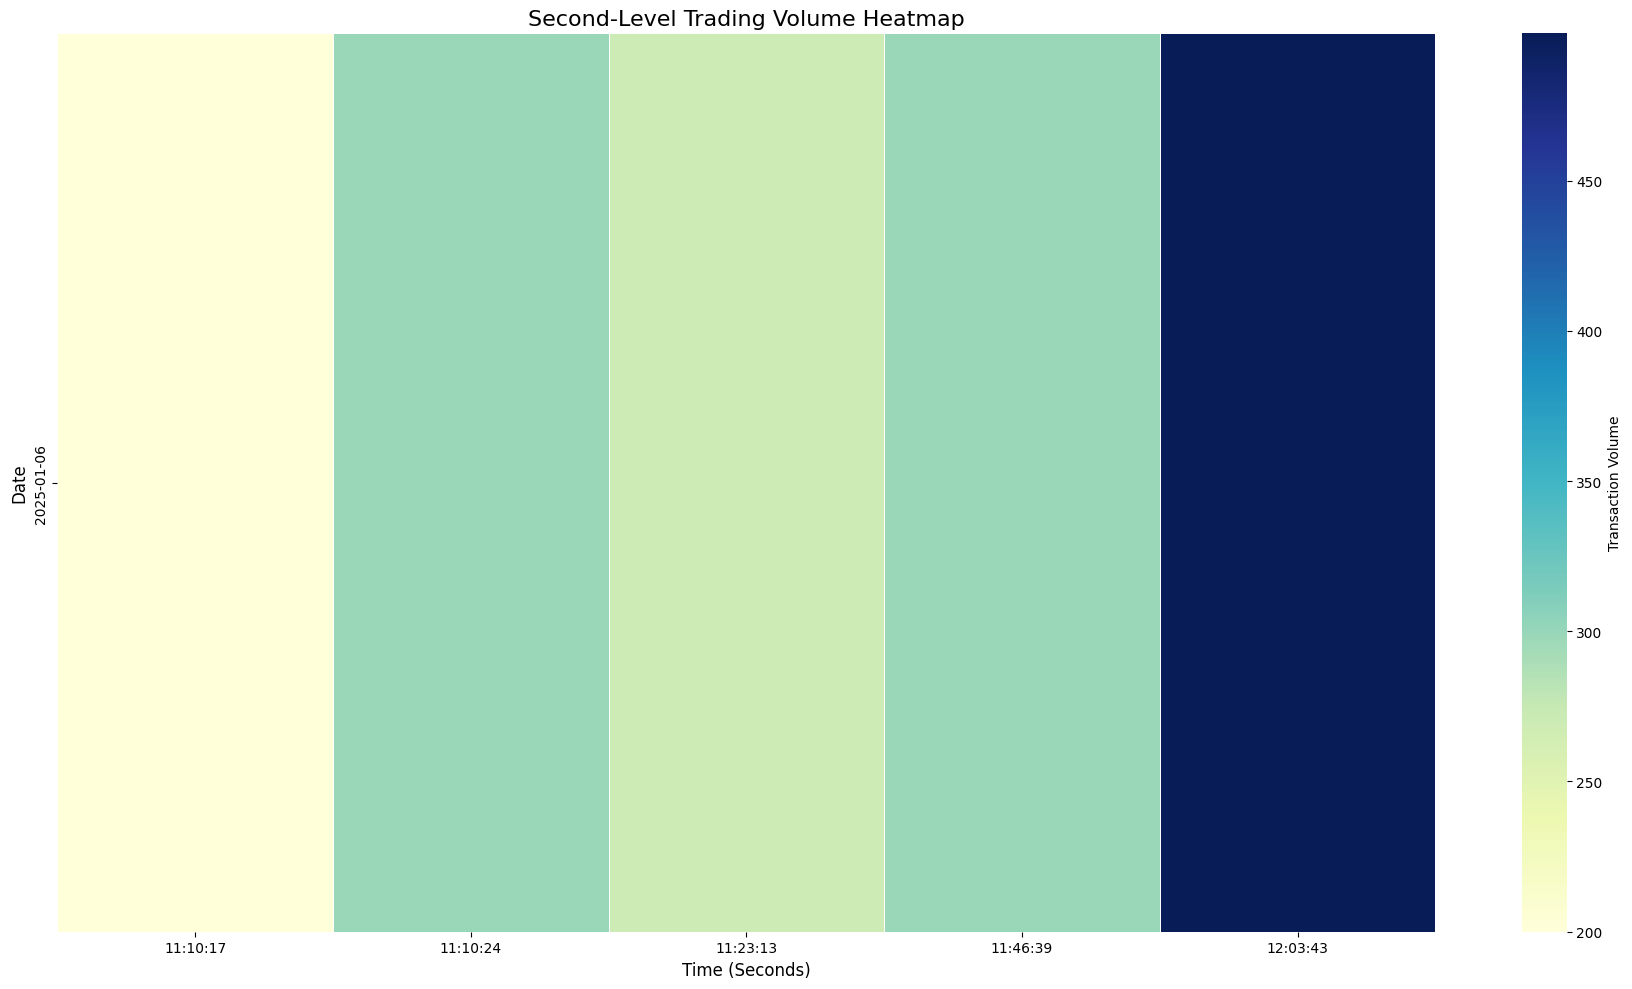

In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

# 准备数据：按日期和时间（精确到秒）聚合交易量
time_heatmap_data = defaultdict(int)
for sole_buyer, symbols in transactions.items():
    for symbol, dates in symbols.items():
        for datetime, values in dates.items():
            date, time = datetime.split(" ")
            time_key = (date, time)  # 时间精确到秒
            time_heatmap_data[time_key] += values["Volume"]

# 转为 DataFrame
heatmap_df = pd.DataFrame(
    [{"Date": k[0], "Time": k[1], "Volume": v} for k, v in time_heatmap_data.items()]
)

# 创建透视表：行是日期，列是时间（精确到秒）
pivot_table = heatmap_df.pivot(index="Date", columns="Time", values="Volume").fillna(0)

# 绘制热力图
plt.figure(figsize=(18, 10))
sns.heatmap(pivot_table, cmap="YlGnBu", cbar_kws={"label": "Transaction Volume"}, linewidths=0.5)
plt.title("Second-Level Trading Volume Heatmap", fontsize=16)
plt.xlabel("Time (Seconds)", fontsize=12)
plt.ylabel("Date", fontsize=12)
plt.tight_layout()
plt.show()


In [174]:
import plotly.express as px

# 使用 Plotly 绘制热力图
fig = px.imshow(
    pivot_table.values,
    labels=dict(x="Time (Seconds)", y="Date", color="Transaction Volume"),
    x=pivot_table.columns,
    y=pivot_table.index,
    color_continuous_scale="YlGnBu",
)

fig.update_layout(title="Second-Level Trading Volume Heatmap", width=1200, height=800)
fig.show()


In [157]:
import plotly.graph_objects as go

# 数据
dates = ['2025-01-06', '2025-01-07', '2025-01-08']
open_prices = [1100, 1150, 1110]
close_prices = [1125, 1130, 1105]
buy_prices = [1115, None, 1120]
sell_prices = [None, 1135, 1108]

# 绘图
fig = go.Figure()

fig.add_trace(go.Scatter(x=dates, y=open_prices, mode='lines+markers', name='Open Price', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=dates, y=close_prices, mode='lines+markers', name='Close Price', line=dict(color='black')))
fig.add_trace(go.Scatter(x=dates, y=buy_prices, mode='markers', name='Buy', marker=dict(color='red', size=10, symbol='circle')))
fig.add_trace(go.Scatter(x=dates, y=sell_prices, mode='markers', name='Sell', marker=dict(color='green', size=10, symbol='triangle-up')))

# 图表设置
fig.update_layout(
    title='Daily Prices with Buy/Sell Markers',
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Legend',
    template='plotly_white'
)

# 显示
fig.show()


In [158]:
import plotly.express as px
import pandas as pd

# 数据
data = {
    'SoleBuyer': ['9868', '9868', '981i', '983i'],
    'Symbol': ['52094', '46775', '52094', '52094'],
    'TransactionPrice': [1115, 6, 1.01, 1.03],
    'Volume': [200, 270, 299, 299]
}

df = pd.DataFrame(data)

# 绘制热力图
fig = px.density_heatmap(
    df,
    x='SoleBuyer',
    y='Symbol',
    z='TransactionPrice',
    color_continuous_scale='Viridis',
    title='Heatmap of Transaction Price by SoleBuyer and Symbol'
)

fig.update_layout(template='plotly_white')
fig.show()


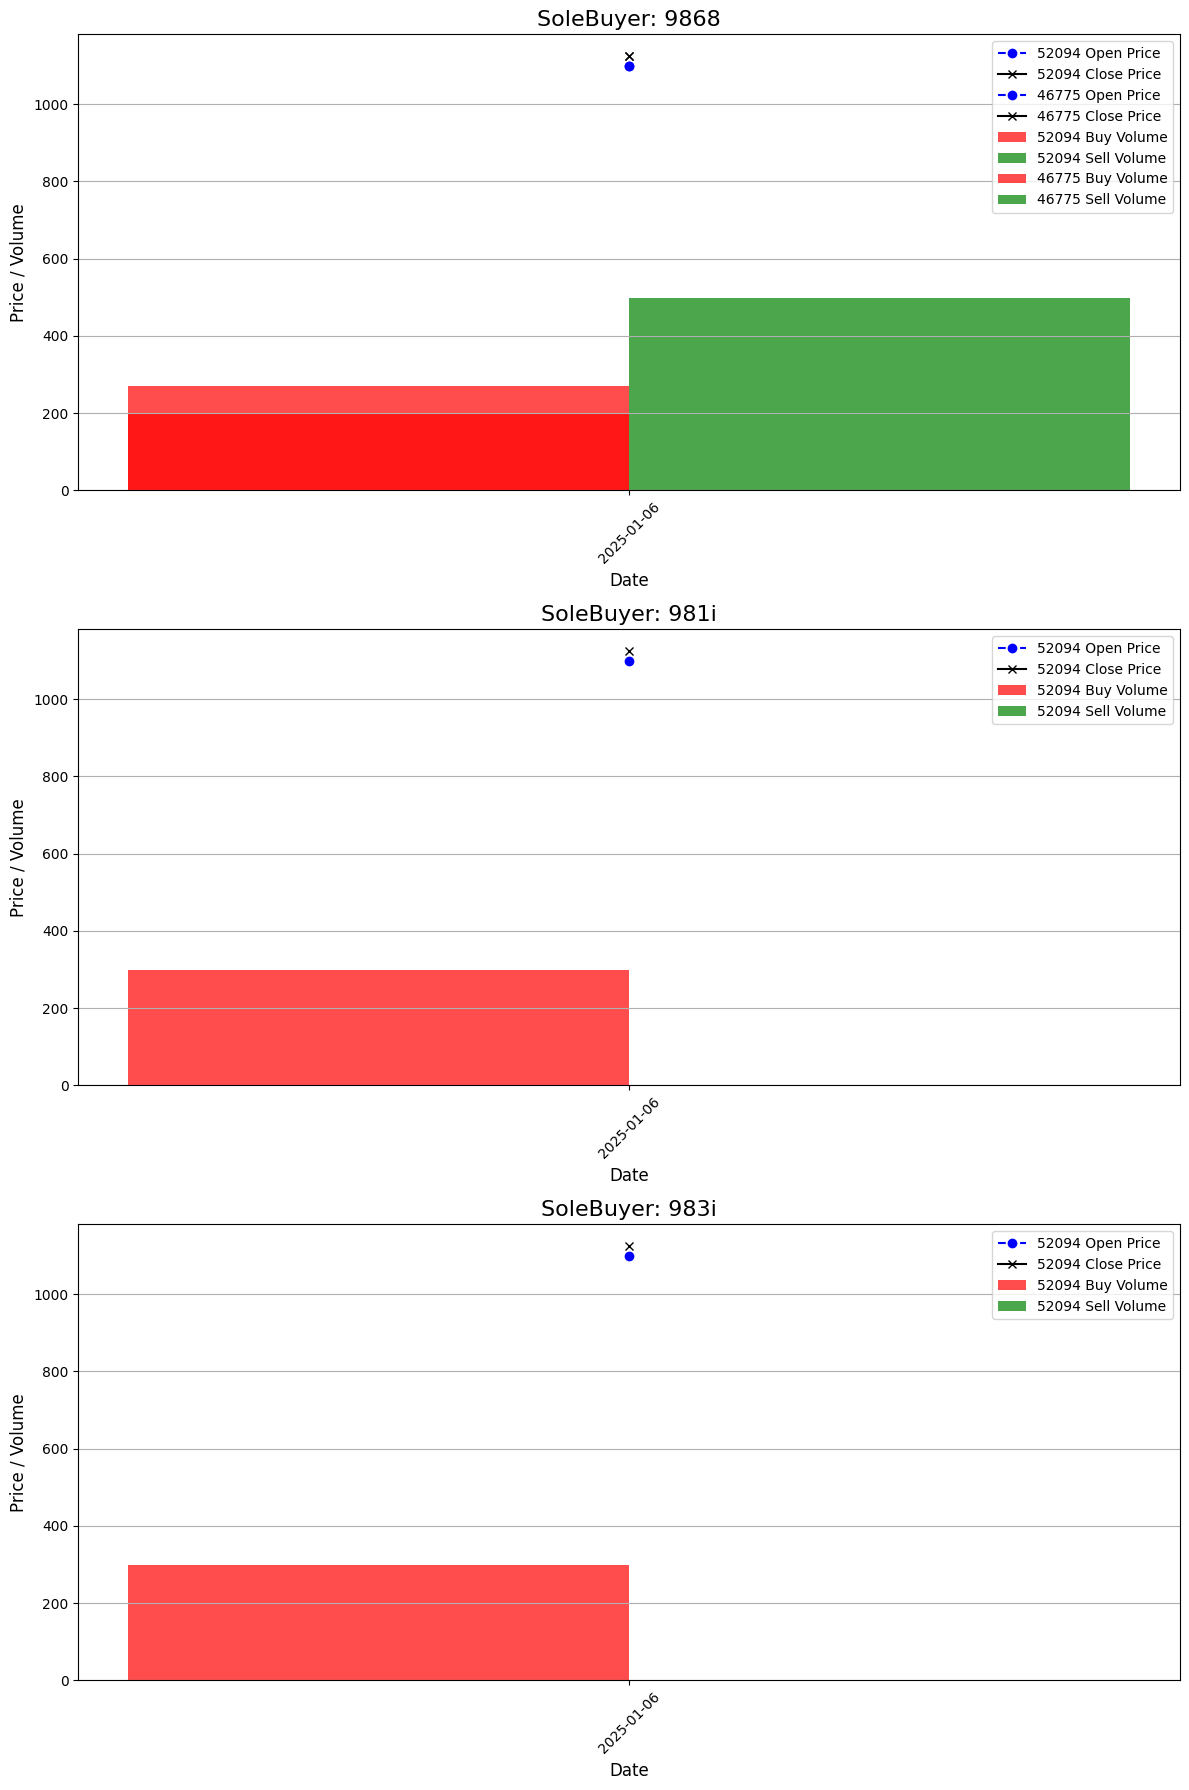

In [163]:
import matplotlib.pyplot as plt
import numpy as np

# 准备数据
daily_prices_data = daily_prices  # 每日开收盘数据
transactions_data = transactions  # 交易数据

# 创建子图：每个 SoleBuyer 一个子图
fig, axes = plt.subplots(len(transactions_data), 1, figsize=(12, 6 * len(transactions_data)))

if len(transactions_data) == 1:
    axes = [axes]  # 保证 axes 是可迭代的

# 遍历每个 SoleBuyer
for ax, (sole_buyer, symbols) in zip(axes, transactions_data.items()):
    for symbol, dates in symbols.items():
        # 提取每日开盘价和收盘价
        dates_sorted = sorted(daily_prices_data.keys())
        open_prices = [daily_prices_data[date]['OpenPrice'] for date in dates_sorted]
        close_prices = [daily_prices_data[date]['ClosePrice'] for date in dates_sorted]

        # 绘制开盘价和收盘价折线图
        ax.plot(dates_sorted, open_prices, label=f'{symbol} Open Price', linestyle='--', marker='o', color='blue')
        ax.plot(dates_sorted, close_prices, label=f'{symbol} Close Price', linestyle='-', marker='x', color='black')

        # 准备每日的买入量和卖出量
        buy_volumes = []
        sell_volumes = []
        for date in dates_sorted:
            buy_volume = sum(
                values['Volume']
                for d, values in dates.items()
                if d.startswith(date) and values['BuyOrSell'] == 'Buy'
            )
            sell_volume = sum(
                values['Volume']
                for d, values in dates.items()
                if d.startswith(date) and values['BuyOrSell'] == 'Sell'
            )
            buy_volumes.append(buy_volume)
            sell_volumes.append(sell_volume)

        # 绘制买入和卖出量的柱状图
        x = np.arange(len(dates_sorted))  # 日期对应的 x 坐标
        ax.bar(x - 0.2, buy_volumes, width=0.4, color='red', label=f'{symbol} Buy Volume', alpha=0.7)
        ax.bar(x + 0.2, sell_volumes, width=0.4, color='green', label=f'{symbol} Sell Volume', alpha=0.7)

    # 设置图表标题、轴标签和图例
    ax.set_title(f'SoleBuyer: {sole_buyer}', fontsize=16)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Price / Volume', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(dates_sorted, rotation=45)
    ax.legend()
    ax.grid(axis='y')

# 调整整体布局
plt.tight_layout()
plt.show()


In [178]:
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import numpy as np

# 股票代码和日期范围
symbol = "2330.TW"  # 替换为目标股票代码
start_date = "2025-01-02"
end_date = "2025-01-09"

# 获取股票数据
data = yf.download(symbol, start=start_date, end=end_date)

# 计算买卖超（这里假设买卖超为成交量的一部分，您可以根据实际数据替换计算逻辑）
data['Buy-Sell'] = np.random.randint(-10000, 10000, size=len(data))  # 模拟数据，可替换为实际净买入量

# 绘制主图（K 线图）
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1]})

# 转换数据格式为 mplfinance 的要求
mpf_data = data[['Open', 'High', 'Low', 'Close']]
mpf_data.index = data.index

# K 线图
mpf.plot(
    mpf_data,
    type='candle',
    ax=ax1,
    volume=False,
    style='charles',
    title=f"{symbol} Price Movement ({start_date} to {end_date})",
    ylabel="Price",
)

# 绘制市场买卖超（柱状图）
colors = ['green' if val >= 0 else 'red' for val in data['Buy-Sell']]
ax2.bar(data.index, data['Buy-Sell'], color=colors, alpha=0.7)
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # 零线
ax2.set_title("Net Buy-Sell Volume")
ax2.set_ylabel("Volume")
ax2.set_xlabel("Date")

# 调整布局
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'mplfinance'